<a href="https://colab.research.google.com/github/mohansivasai/Traffic-Sign-Classification/blob/master/Deep_Learning_For_Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TRAFFIC SIGN CLASSIFICATION


#  IMPORT LIBRARIES/DATASETS

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



## GATHERING THE DATA


In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
with open("/content/gdrive/My Drive/datasets/Traffic Signs/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/gdrive/My Drive/datasets/Traffic Signs/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/gdrive/My Drive/datasets/Traffic Signs/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train , y_train = train['features'],train['labels']
X_val , y_val = valid['features'],valid['labels']
X_test , y_test = test['features'],test['labels']

In [7]:
print('Shape of Training data:    ',X_train.shape)
print('Shape of Training labels:  ',y_train.shape)
print('Shape of Validation data:  ',X_val.shape)
print('Shape of Validation labels:',y_val.shape)
print('Shape of Testing data:     ',X_test.shape)
print('Shape of Testing labels:   ',y_test.shape)

Shape of Training data:     (34799, 32, 32, 3)
Shape of Training labels:   (34799,)
Shape of Validation data:   (4410, 32, 32, 3)
Shape of Validation labels: (4410,)
Shape of Testing data:      (12630, 32, 32, 3)
Shape of Testing labels:    (12630,)


In [10]:
labels = {
0  :'Speed limit (20km/h)',
1  : 'Speed limit (30km/h)',
2  : 'Speed limit (50km/h)',
3  : 'Speed limit (60km/h)',
4  : 'Speed limit (70km/h)',
5  : 'Speed limit (80km/h)',
6  :'End of speed limit (80km/h)',
7  : 'Speed limit (100km/h)',
8  :'Speed limit (120km/h)',
9  :'No passing',
10 : 'No passing for vehicles over 3.5 metric tons',
11 : 'Right-of-way at the next intersection',
12 : 'Priority road',
13 : 'Yield',
14 :' Stop',
15 : 'No vehicles',
16 : 'Vehicles over 3.5 metric tons prohibited',
17 : 'No entry',
18 : 'General caution',
19 : 'Dangerous curve to the left',
20 : 'Dangerous curve to the right',
21 : 'Double curve',
22 : 'Bumpy road',
23 : 'Slippery road',
24 : 'Road narrows on the right',
25 : 'Road work',
26 : 'Traffic signals',
27 : 'Pedestrians',
28 : 'Children crossing',
29 : 'Bicycles crossing',
30 : 'Beware of ice/snow',
31 : 'Wild animals crossing',
32 : 'End of all speed and passing limits',
33 : 'Turn right ahead',
34 : 'Turn left ahead',
35 : 'Ahead only',
36 : 'Go straight or right',
37 : 'Go straight or left',
38 : 'Keep right',
39 : 'Keep left',
40 : 'Roundabout mandatory',
41 : 'End of no passing',
42 : 'End of no passing by vehicles over 3.5 metric tons'}

#  PERFORM IMAGES VISUALIZATION

37

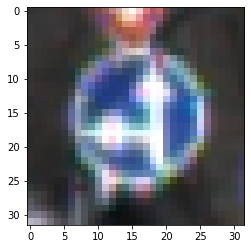

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

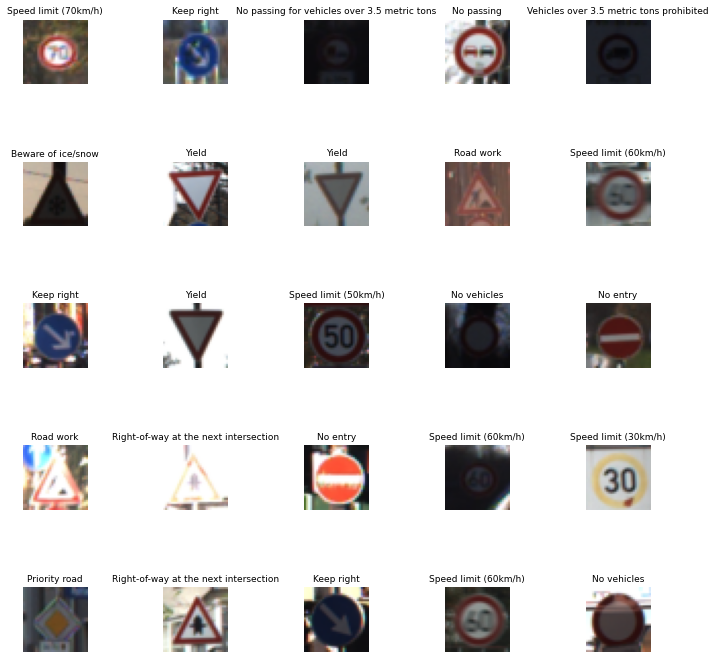

In [25]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# create evenly spaces variables 
for i in range(0,W_grid*L_grid):
  idx = np.random.randint(0,n_training) # Select a random number from 0 to n_training
  axes[i].imshow(X_train[idx])
  axes[i].set_title(labels[y_train[idx]],fontsize =9)
  axes[i].axis('off') 
    
plt.subplots_adjust(hspace=0.8,wspace=0.8)

plt.tight_layout()      

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [26]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [27]:
#Converting the color images to Grayscale
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
X_val_gray = np.sum(X_val/3,axis=3,keepdims=True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)

In [28]:
print("shape of input grayscale:",X_train_gray.shape)

shape of input grayscale: (34799, 32, 32, 1)


In [29]:
# Normalization
X_train_gray_norm = X_train_gray/256
X_val_gray_norm = X_val_gray/256
X_test_gray_norm = X_test_gray/256

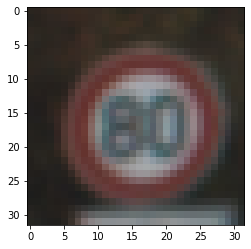

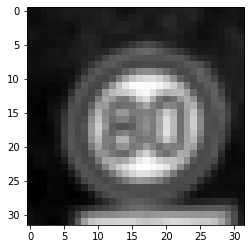

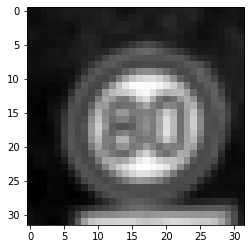

In [34]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [33]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping,CSVLogger,ReduceLROnPlateau, ModelCheckpoint

In [31]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(43,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4

#  COMPILE AND TRAIN DEEP CNN MODEL

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

 Callbacks:




In [36]:
early_stopping = EarlyStopping(patience=5,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=0.2,patience=5,verbose=1)
csv_log = CSVLogger('logs.csv')
checkpoint = ModelCheckpoint('checkpoint',save_freq='epoch')
callbacks = [early_stopping,reduce_lr,csv_log,checkpoint]

In [37]:
history = model.fit(X_train_gray_norm,y_train,epochs=25,batch_size=128,validation_data=(X_val_gray_norm,y_val),verbose=1,callbacks=callbacks)

Epoch 1/25
272/272 [==============================] - ETA: 0s - loss: 2.3552 - accuracy: 0.3796WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: checkpoint/assets
272/272 [==============================] - 4s 14ms/step - loss: 2.3552 - accuracy: 0.3796 - val_loss: 1.2160 - val_accuracy: 0.6404
Epoch 2/25
272/272 [==============================] - 3s 11ms/step - loss: 0.5992 - accuracy: 0.8401 - val_loss: 0.6197 - val_accuracy: 0.8395
Epoch 3/25
272/272 [==============================] - 3s 11ms/step - loss: 0.3039 - accuracy: 0.9233 - va

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

![image.png](attachment:image.png)

In [38]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.7421 - accuracy: 0.8998
Test Accuracy: 0.8998416662216187


In [ ]:
history.history.keys()

In [39]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

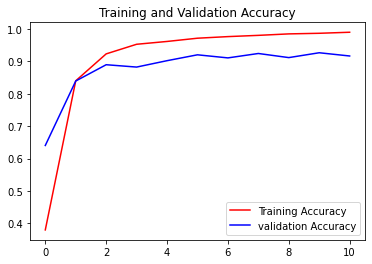

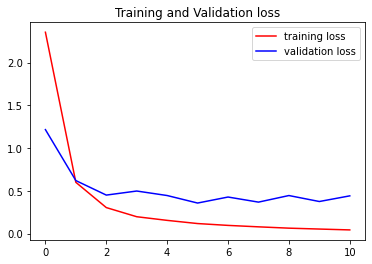

In [40]:
#Plotting the Accuracy and loss
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'r',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and Validation loss')
plt.legend()

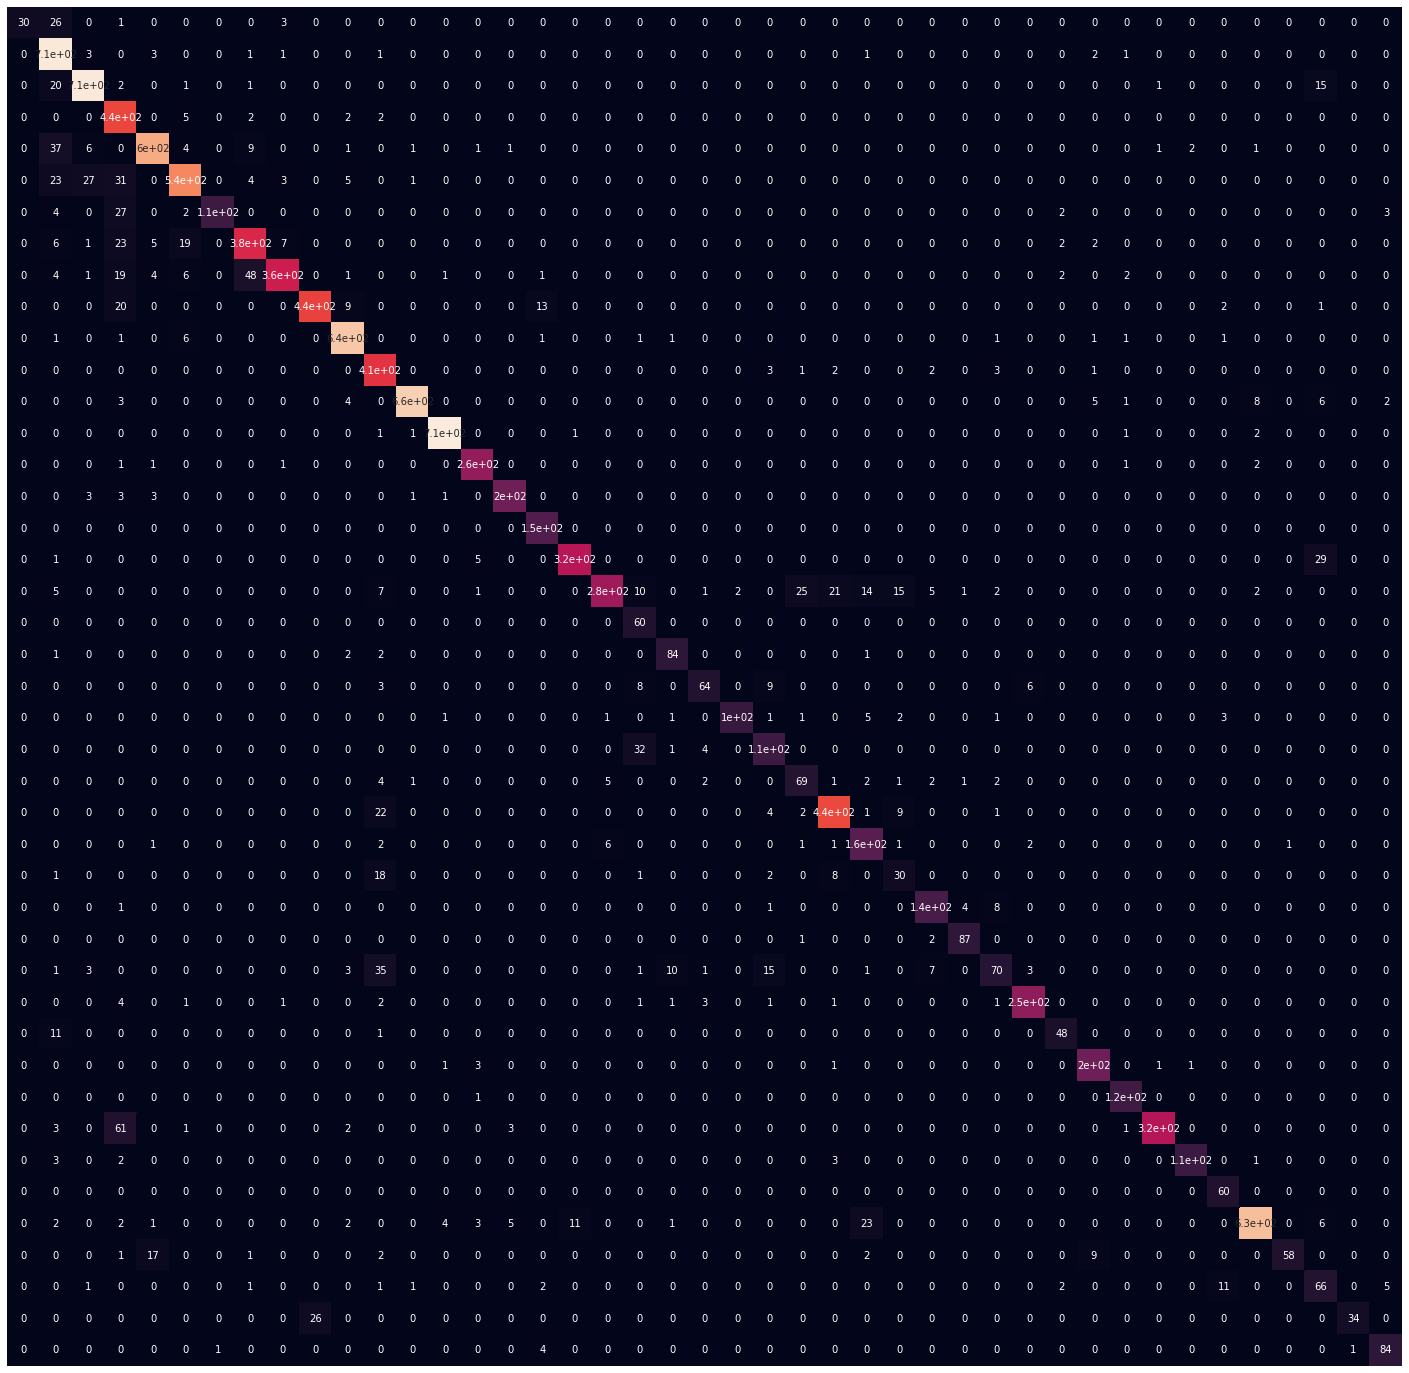

In [43]:
predicted_classes = model.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True,xticklabels=False,yticklabels=False,cbar=0)

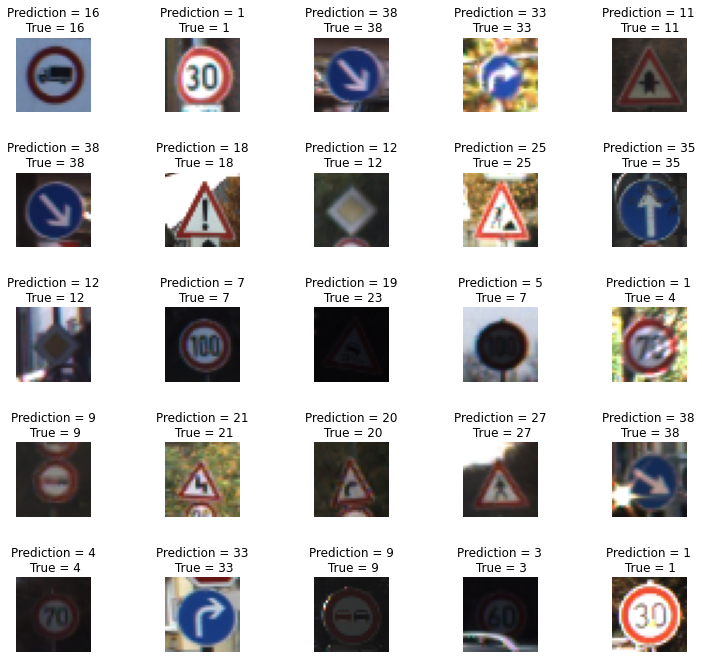

In [44]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# CONGRATULATIONS ON FINISHING THE PROJECT!

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }